# **Import Packages**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#**Read churn data in csv**

In [3]:
df = pd.read_csv(r'drive/MyDrive/Pfizer_Assessment/DataSet/Telco-Customer-Churn.csv',index_col=None)

# **Profile the data for nulls and duplicates**

In [4]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


##### No Nulls or duplicates present in data

# **Exploratory data analysis**

##### Dropping customerID colum as it doesn't contribute to correlations or predictions owing to it's very high cardinality.

In [9]:
df_fine_tune = df.drop(['customerID'], axis = 1)

In [10]:
df_fine_tune.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Identify all categorical feature columns on the basis of following observations:
##### 1. All categorical columns contain discreet categorical values rather than continuous numerical values.
##### 2. We have identified columns SeniorCitizen, Partner,	Dependents,	PhoneService,	MultipleLines,	InternetService,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod so we would be using One Hot encoding to convert it to binary 0 and 1 (SeniorCitizen is already in 0 and 1).
##### 3. We have identified churn output column as categorical too hence we would be converting it to binary 0 and 1.  

In [11]:
df_fine_tune['Churn']=df_fine_tune['Churn'].map({"Yes":1,"No":0})
df_fine_tune_encoded = pd.get_dummies(df_fine_tune, columns=['gender',
                                                             'Partner',
                                                             'Dependents',
                                                             'PhoneService',
                                                             'MultipleLines',
                                                             'InternetService',
                                                             'OnlineSecurity',
                                                             'OnlineBackup',
                                                             'DeviceProtection',
                                                             'TechSupport',
                                                             'StreamingTV',
                                                             'StreamingMovies',
                                                             'Contract',
                                                             'PaperlessBilling',
                                                             'PaymentMethod'],drop_first=False,dtype='int')
df_fine_tune_encoded.columns = df_fine_tune_encoded.columns.str.replace(' ', '_')

In [12]:
df_fine_tune_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   object 
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   int64  
 6   gender_Male                              7043 non-null   int64  
 7   Partner_No                               7043 non-null   int64  
 8   Partner_Yes                              7043 non-null   int64  
 9   Dependents_No                            7043 non-null   int64  
 10  Dependents_Yes                           7043 no

###### Validate all numeric columns for consistency and correctness

In [13]:
df_fine_tune_numeric = df_fine_tune_encoded[['tenure','MonthlyCharges','TotalCharges']].apply(pd.to_numeric,errors='coerce')
df_fine_tune_numeric.isnull().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,11


###### We see that total charges has some values which are numerically inconsistent. Let see those values

In [14]:
df_fine_tune_numeric[np.isnan(df_fine_tune_numeric['TotalCharges'])]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


##### Also we see that the tenure values are zero hence we can drop these rows. It doesn't impact the overall dataset owing to infinitesimally small percentage (11/7043)*100 ~ 0.15%

In [15]:
df_fine_tune_encoded.drop(labels=df_fine_tune_numeric[df_fine_tune_numeric['tenure'] == 0].index, axis=0, inplace=True)

In [16]:
df_fine_tune_encoded[['TotalCharges']] = df_fine_tune_encoded[['TotalCharges']].apply(pd.to_numeric, errors='coerce')

In [17]:
df_fine_tune_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


##### Generate correlation plots

<Axes: >

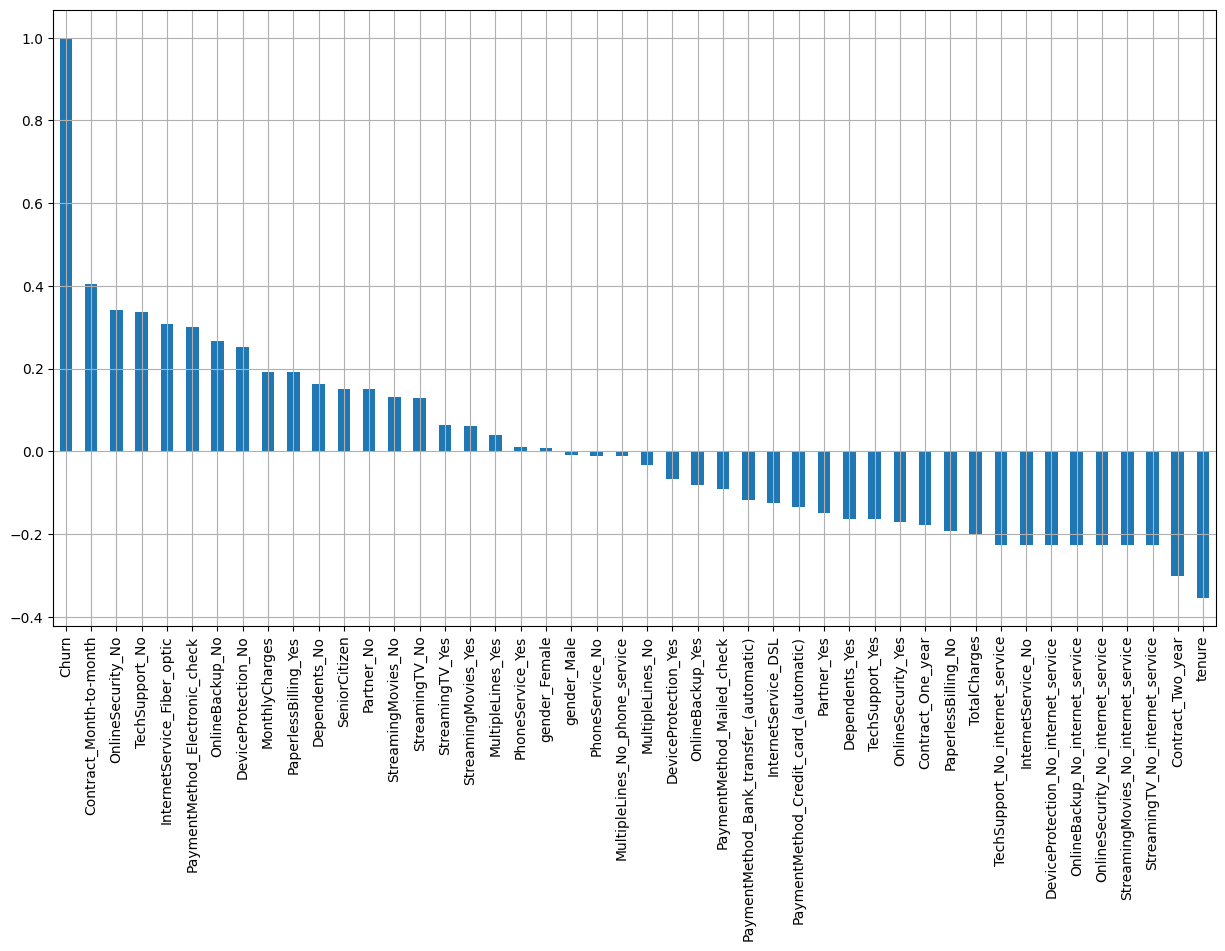

In [18]:
plt.figure(figsize=(15,8))
df_fine_tune_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',grid=True)

##### We see quite a few interesting observations:

 *   Contracts on a month to month basis, no online_security, no tech support are directly proportional to churn. Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
 *  Tenure, two year contracts, Online security, streaming TV, online backup, tech support  without internet connection are inversely proportional to churn.
*  Next We would explore individual categorical variables in details.

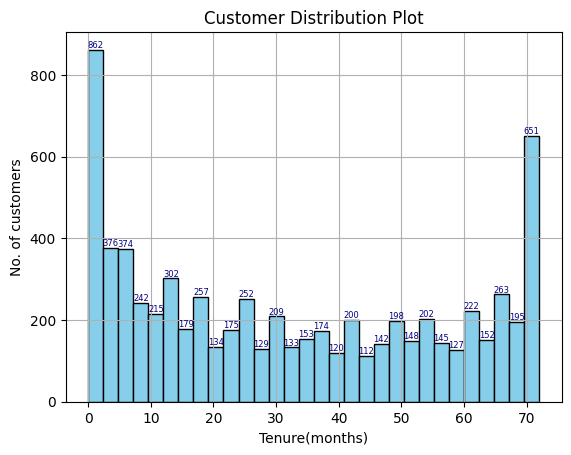

In [19]:
# For Tenure
counts, bins, bars= plt.hist(df_fine_tune['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.bar_label(bars, fontsize=6, color='navy')
plt.xlabel('Tenure(months)')
plt.ylabel('No. of customers')
plt.title('Customer Distribution Plot')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of Customers')

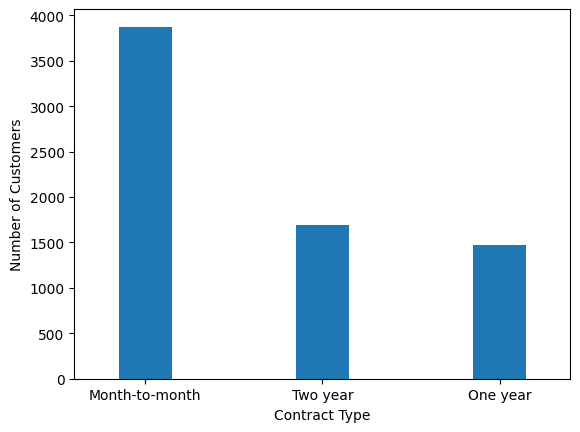

In [20]:
# For Contract
ax = df_fine_tune['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_xlabel('Contract Type')
ax.set_ylabel('Number of Customers')

##### We see that the customers distribution is relatively higher for just little over a month as well as for 70 months. Given that it could be due to contract durations, we see that distribution is more than twice for a month to month contract than two year or one year contract type. Hence it's imperative to explore relationships between them.

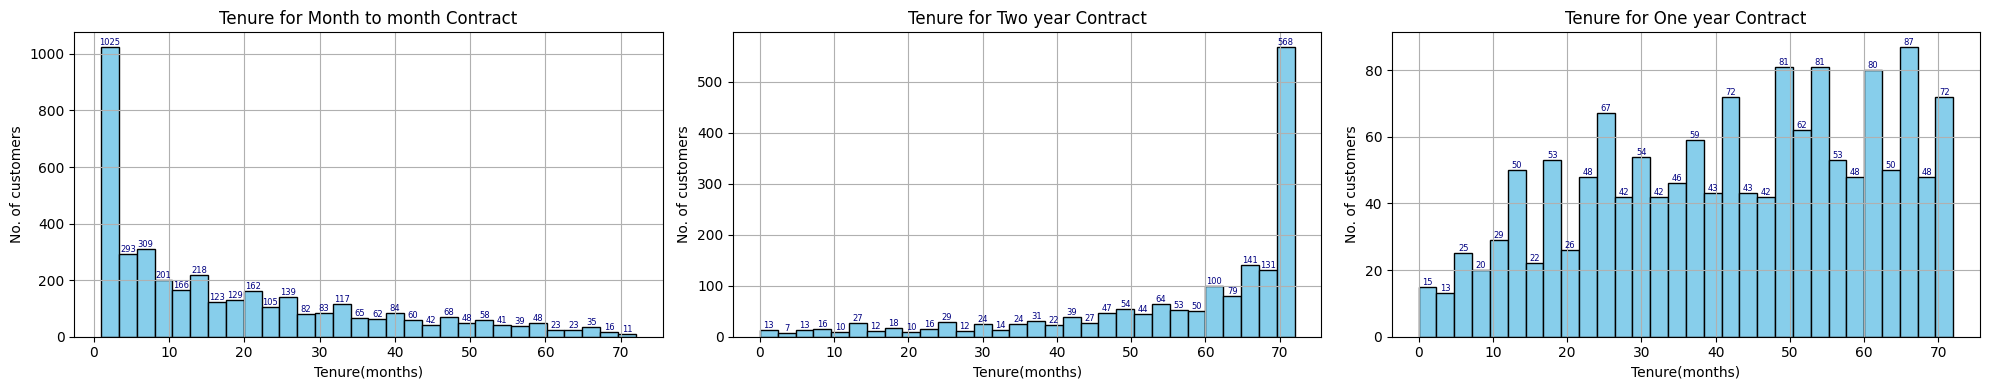

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# Plot Customer Tenure distribution for month to month Contract
counts, bins, bars= ax1.hist(df_fine_tune[df_fine_tune['Contract']=='Month-to-month']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax1.bar_label(bars, fontsize=6, color='navy')
ax1.set_xlabel('Tenure(months)')
ax1.set_ylabel('No. of customers')
ax1.set_title('Tenure for Month to month Contract')
ax1.grid(True)

# Plot Customer Tenure distribution for Two Year Contract
counts, bins, bars= ax2.hist(df_fine_tune[df_fine_tune['Contract']=='Two year']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax2.bar_label(bars, fontsize=6, color='navy')
ax2.set_xlabel('Tenure(months)')
ax2.set_ylabel('No. of customers')
ax2.set_title('Tenure for Two year Contract')
ax2.grid(True)

# Plot Customer Tenure distribution for One Year Contract
counts, bins, bars= ax3.hist(df_fine_tune[df_fine_tune['Contract']=='One year']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax3.bar_label(bars, fontsize=6, color='navy')
ax3.set_xlabel('Tenure(months)')
ax3.set_ylabel('No. of customers')
ax3.set_title('Tenure for One year Contract')
ax3.grid(True)



plt.tight_layout() # Adjust subplot params for tight layout
plt.show()

##### Month-to-month contracts last for 1-2 months, but 2 year contracts last for 70 months. This shows that the customers opting for longer contracts with the company stay with it for a longer period of time which is inline with what we saw in earlier chart on correlation with the churn rate. Let's look at other variables to explore their churn contribution.

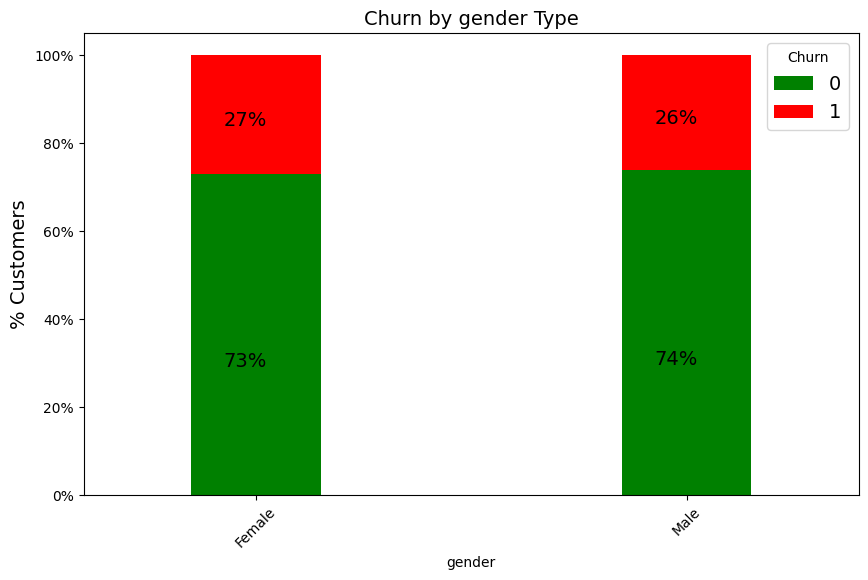

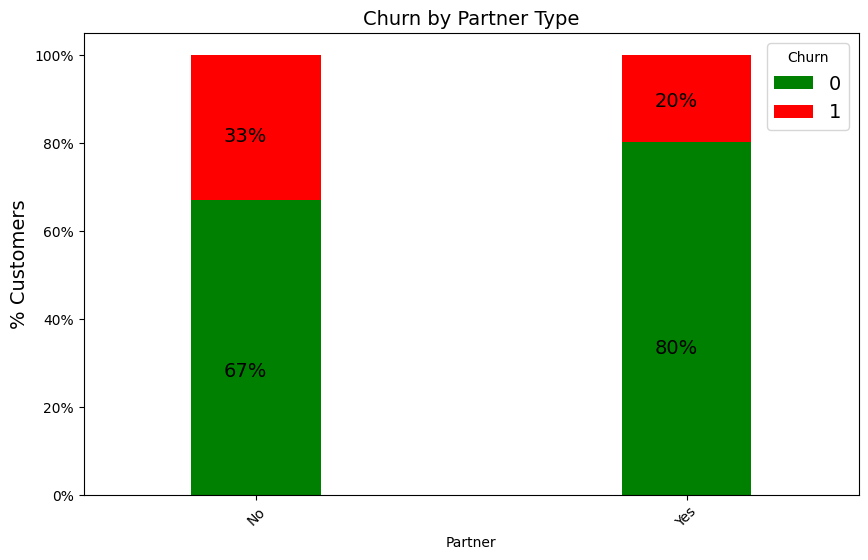

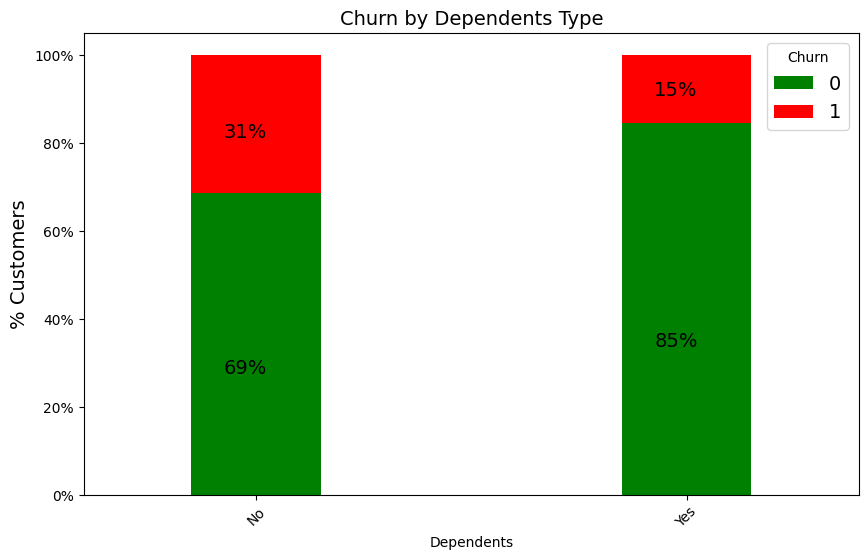

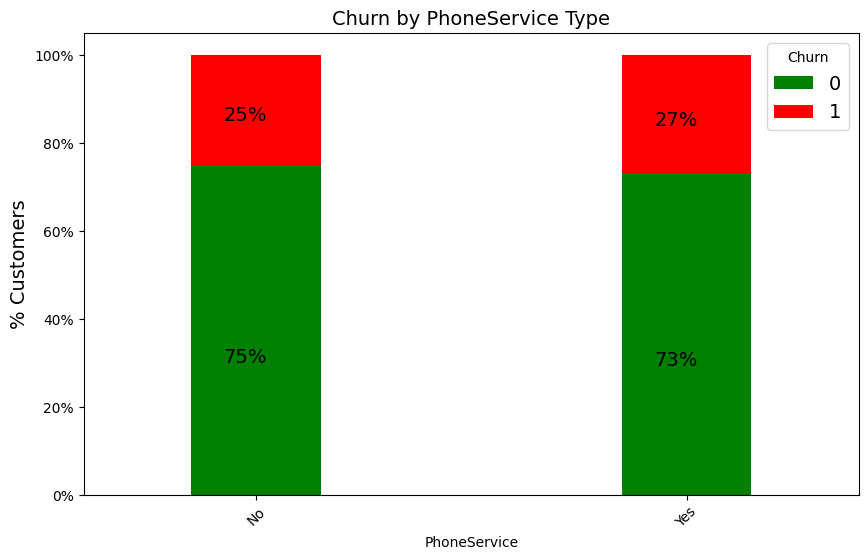

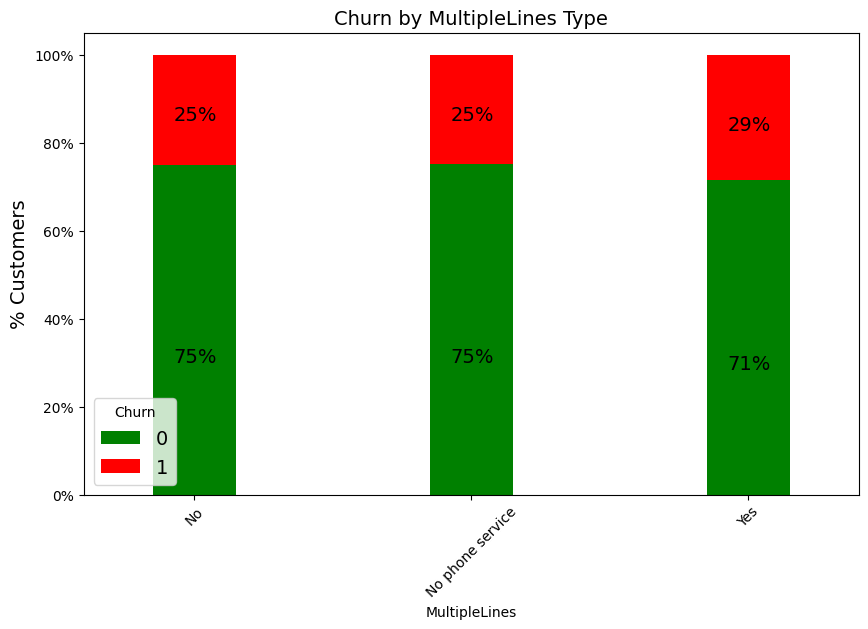

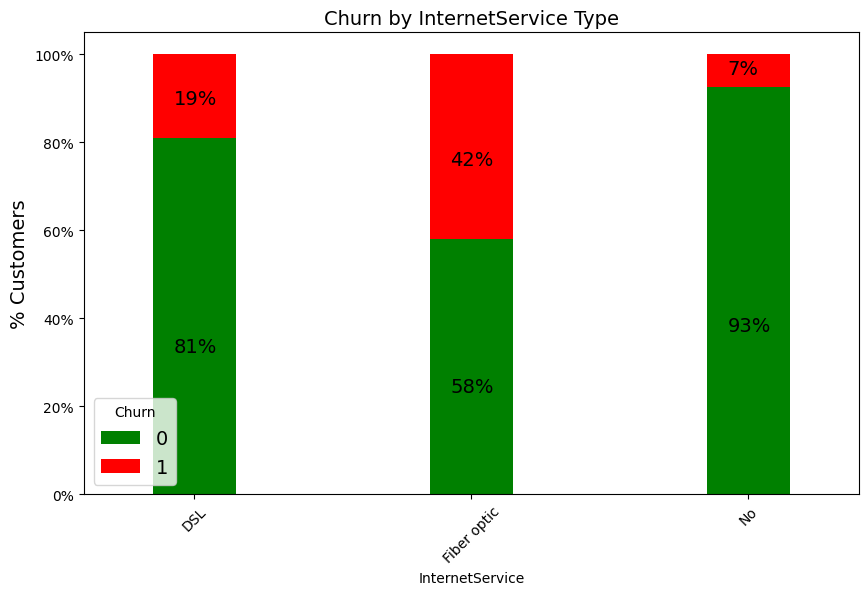

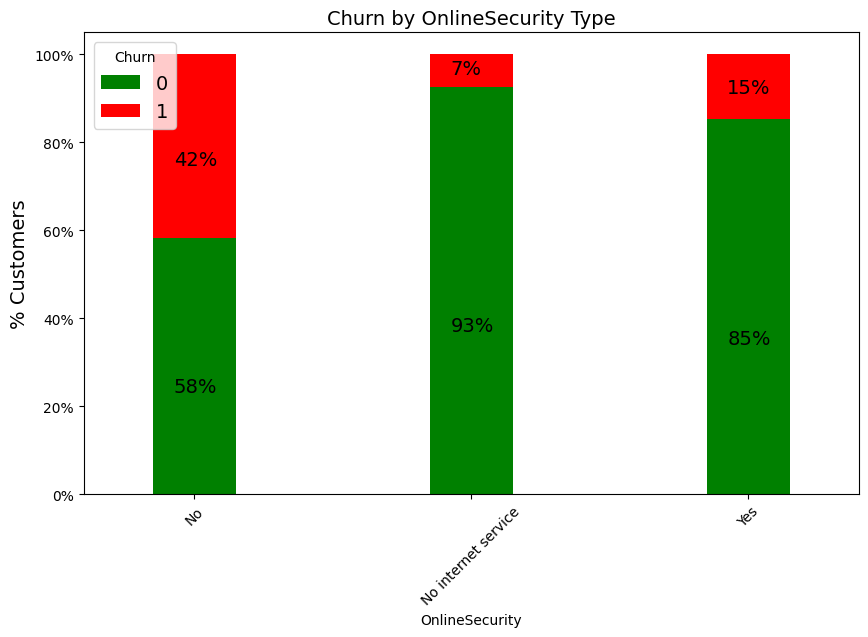

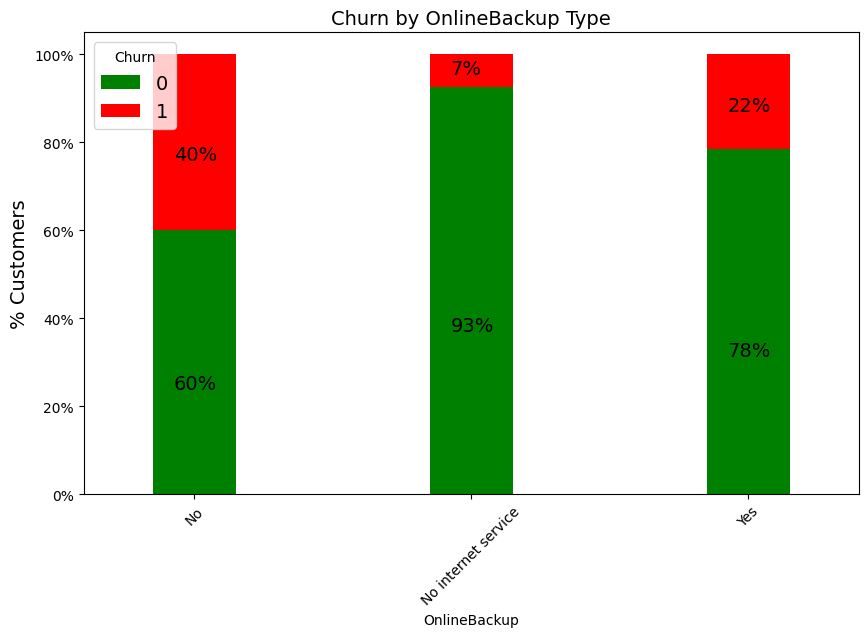

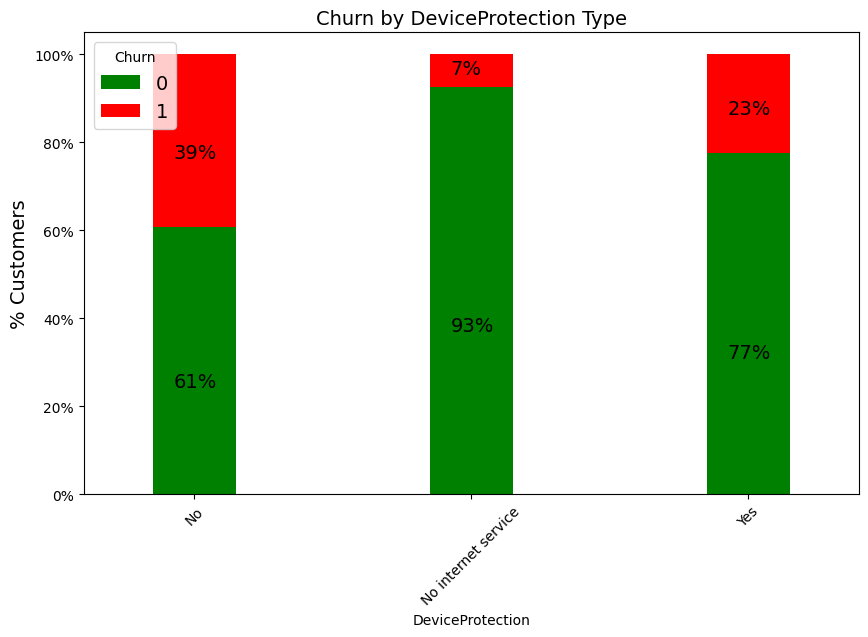

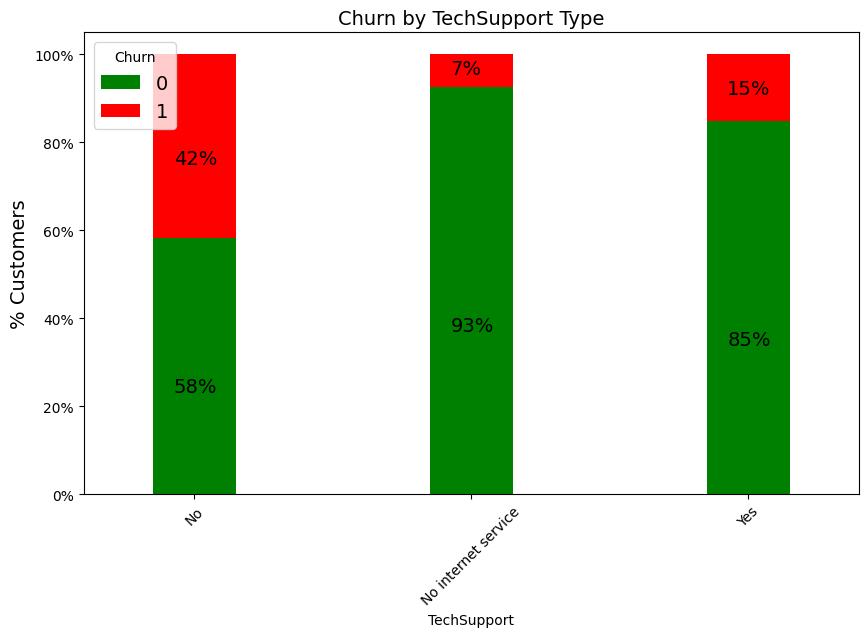

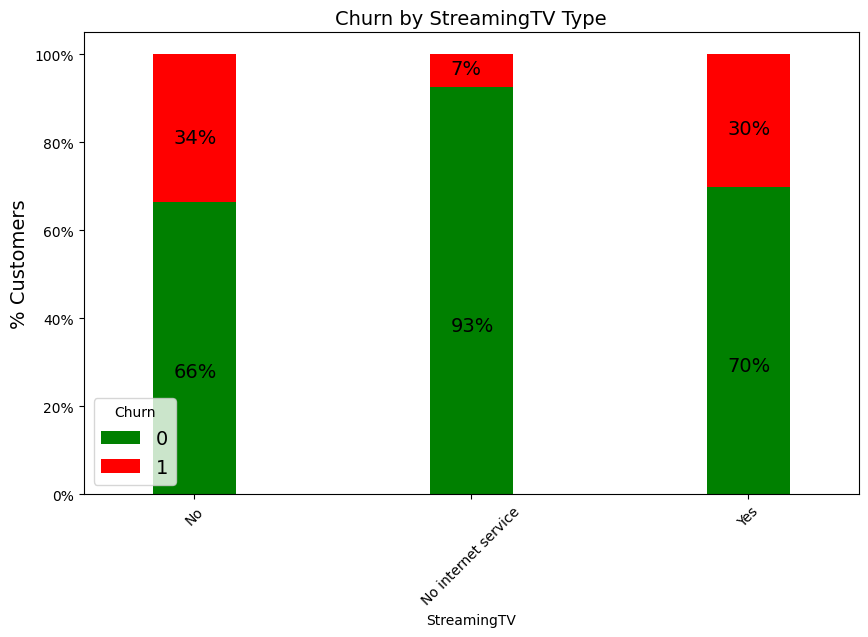

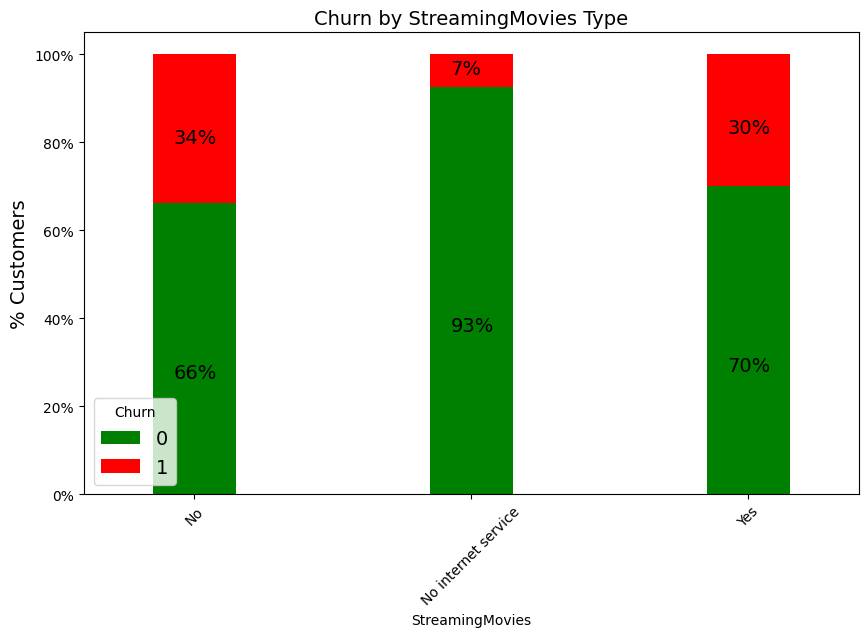

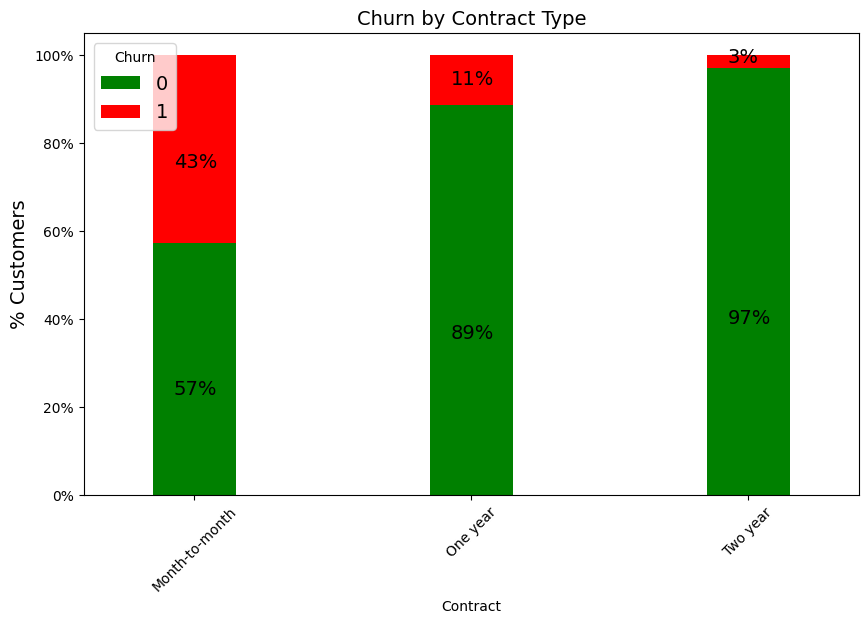

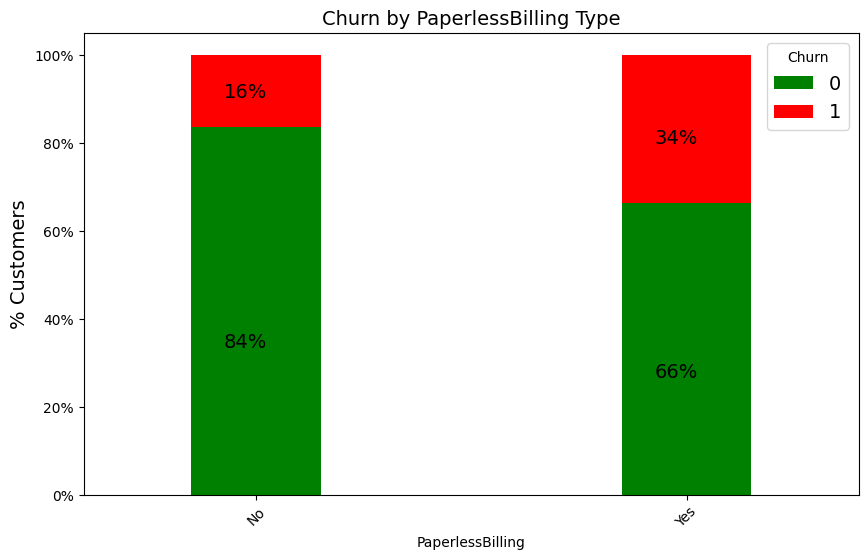

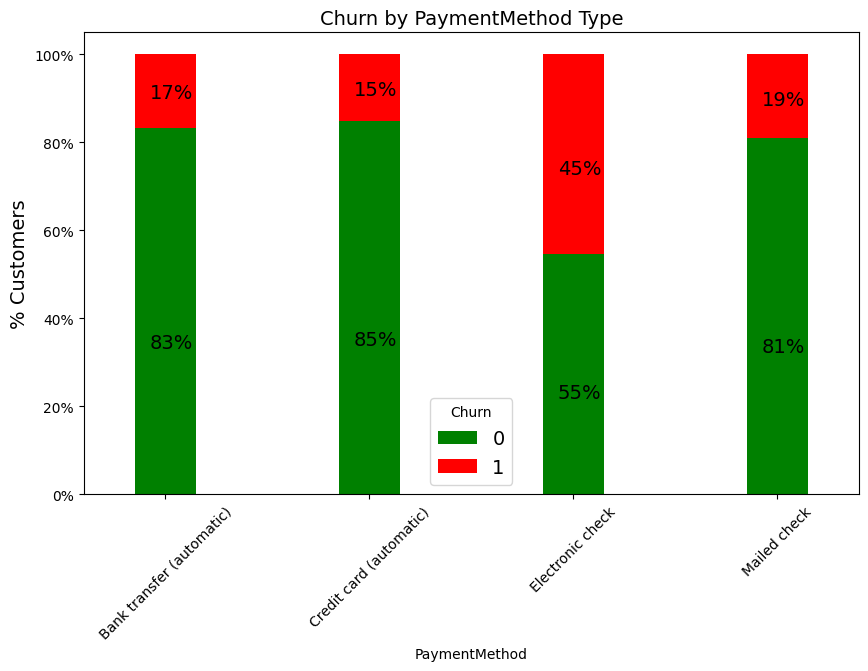

In [22]:
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages

columns_list=['gender',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod']


color_map = {0: 'green', 1: 'red'}

figures = []

for column_name in columns_list:

  contract_churn = df_fine_tune.groupby([column_name,'Churn']).size().unstack()

  ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                  width = 0.3,
                                                                  stacked = True,
                                                                  rot = 45,
                                                                  figsize = (10,6),
                                                                  color = color_map)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.legend(loc='best',prop={'size':14},title = 'Churn')
  ax.set_ylabel('% Customers',size = 14)
  ax.set_title(f'Churn by {column_name} Type',size = 14)

  # Code to add the data labels on the stacked bar chart
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                  color = 'black',
                size = 14)

#   figures.append(ax.get_figure())

# # Save all figures to a single PDF file
# with PdfPages('output_plots.pdf') as pdf:
#   for fig in figures:
#       # Save the current figure into the pdf page
#       pdf.savefig(fig, bbox_inches='tight') # bbox_inches='tight' helps ensure labels fit
#       plt.close(fig) # Close the figure to free memory

<Axes: xlabel='Churn'>

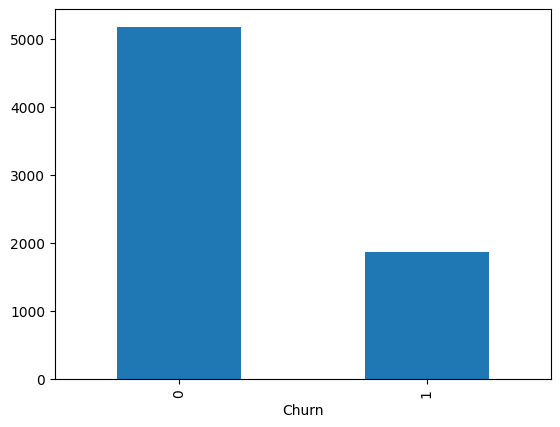

In [23]:
df_fine_tune['Churn'].value_counts().plot(kind='bar')

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(len(df_fine_tune_encoded.columns)):
  vif.append(variance_inflation_factor(df_fine_tune_encoded.values, i))

pd.DataFrame(vif, index=df_fine_tune_encoded.columns, columns=['VIF'])

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF
SeniorCitizen,1.155144
tenure,7.601061
MonthlyCharges,866.100958
TotalCharges,10.883913
Churn,1.396760
gender_Female,inf
gender_Male,inf
Partner_No,inf
Partner_Yes,inf
Dependents_No,inf


We have identified six major contributor features to churn i.e OnlineSecurity, OnlineBackup, Paperless Billing, PaymentType, ContractType, TechSupport Availability based on the above visualizations. We can corroboarate our observation from the correlation heatmap visualization below. Also we see a marked class imbalance for churn variable.

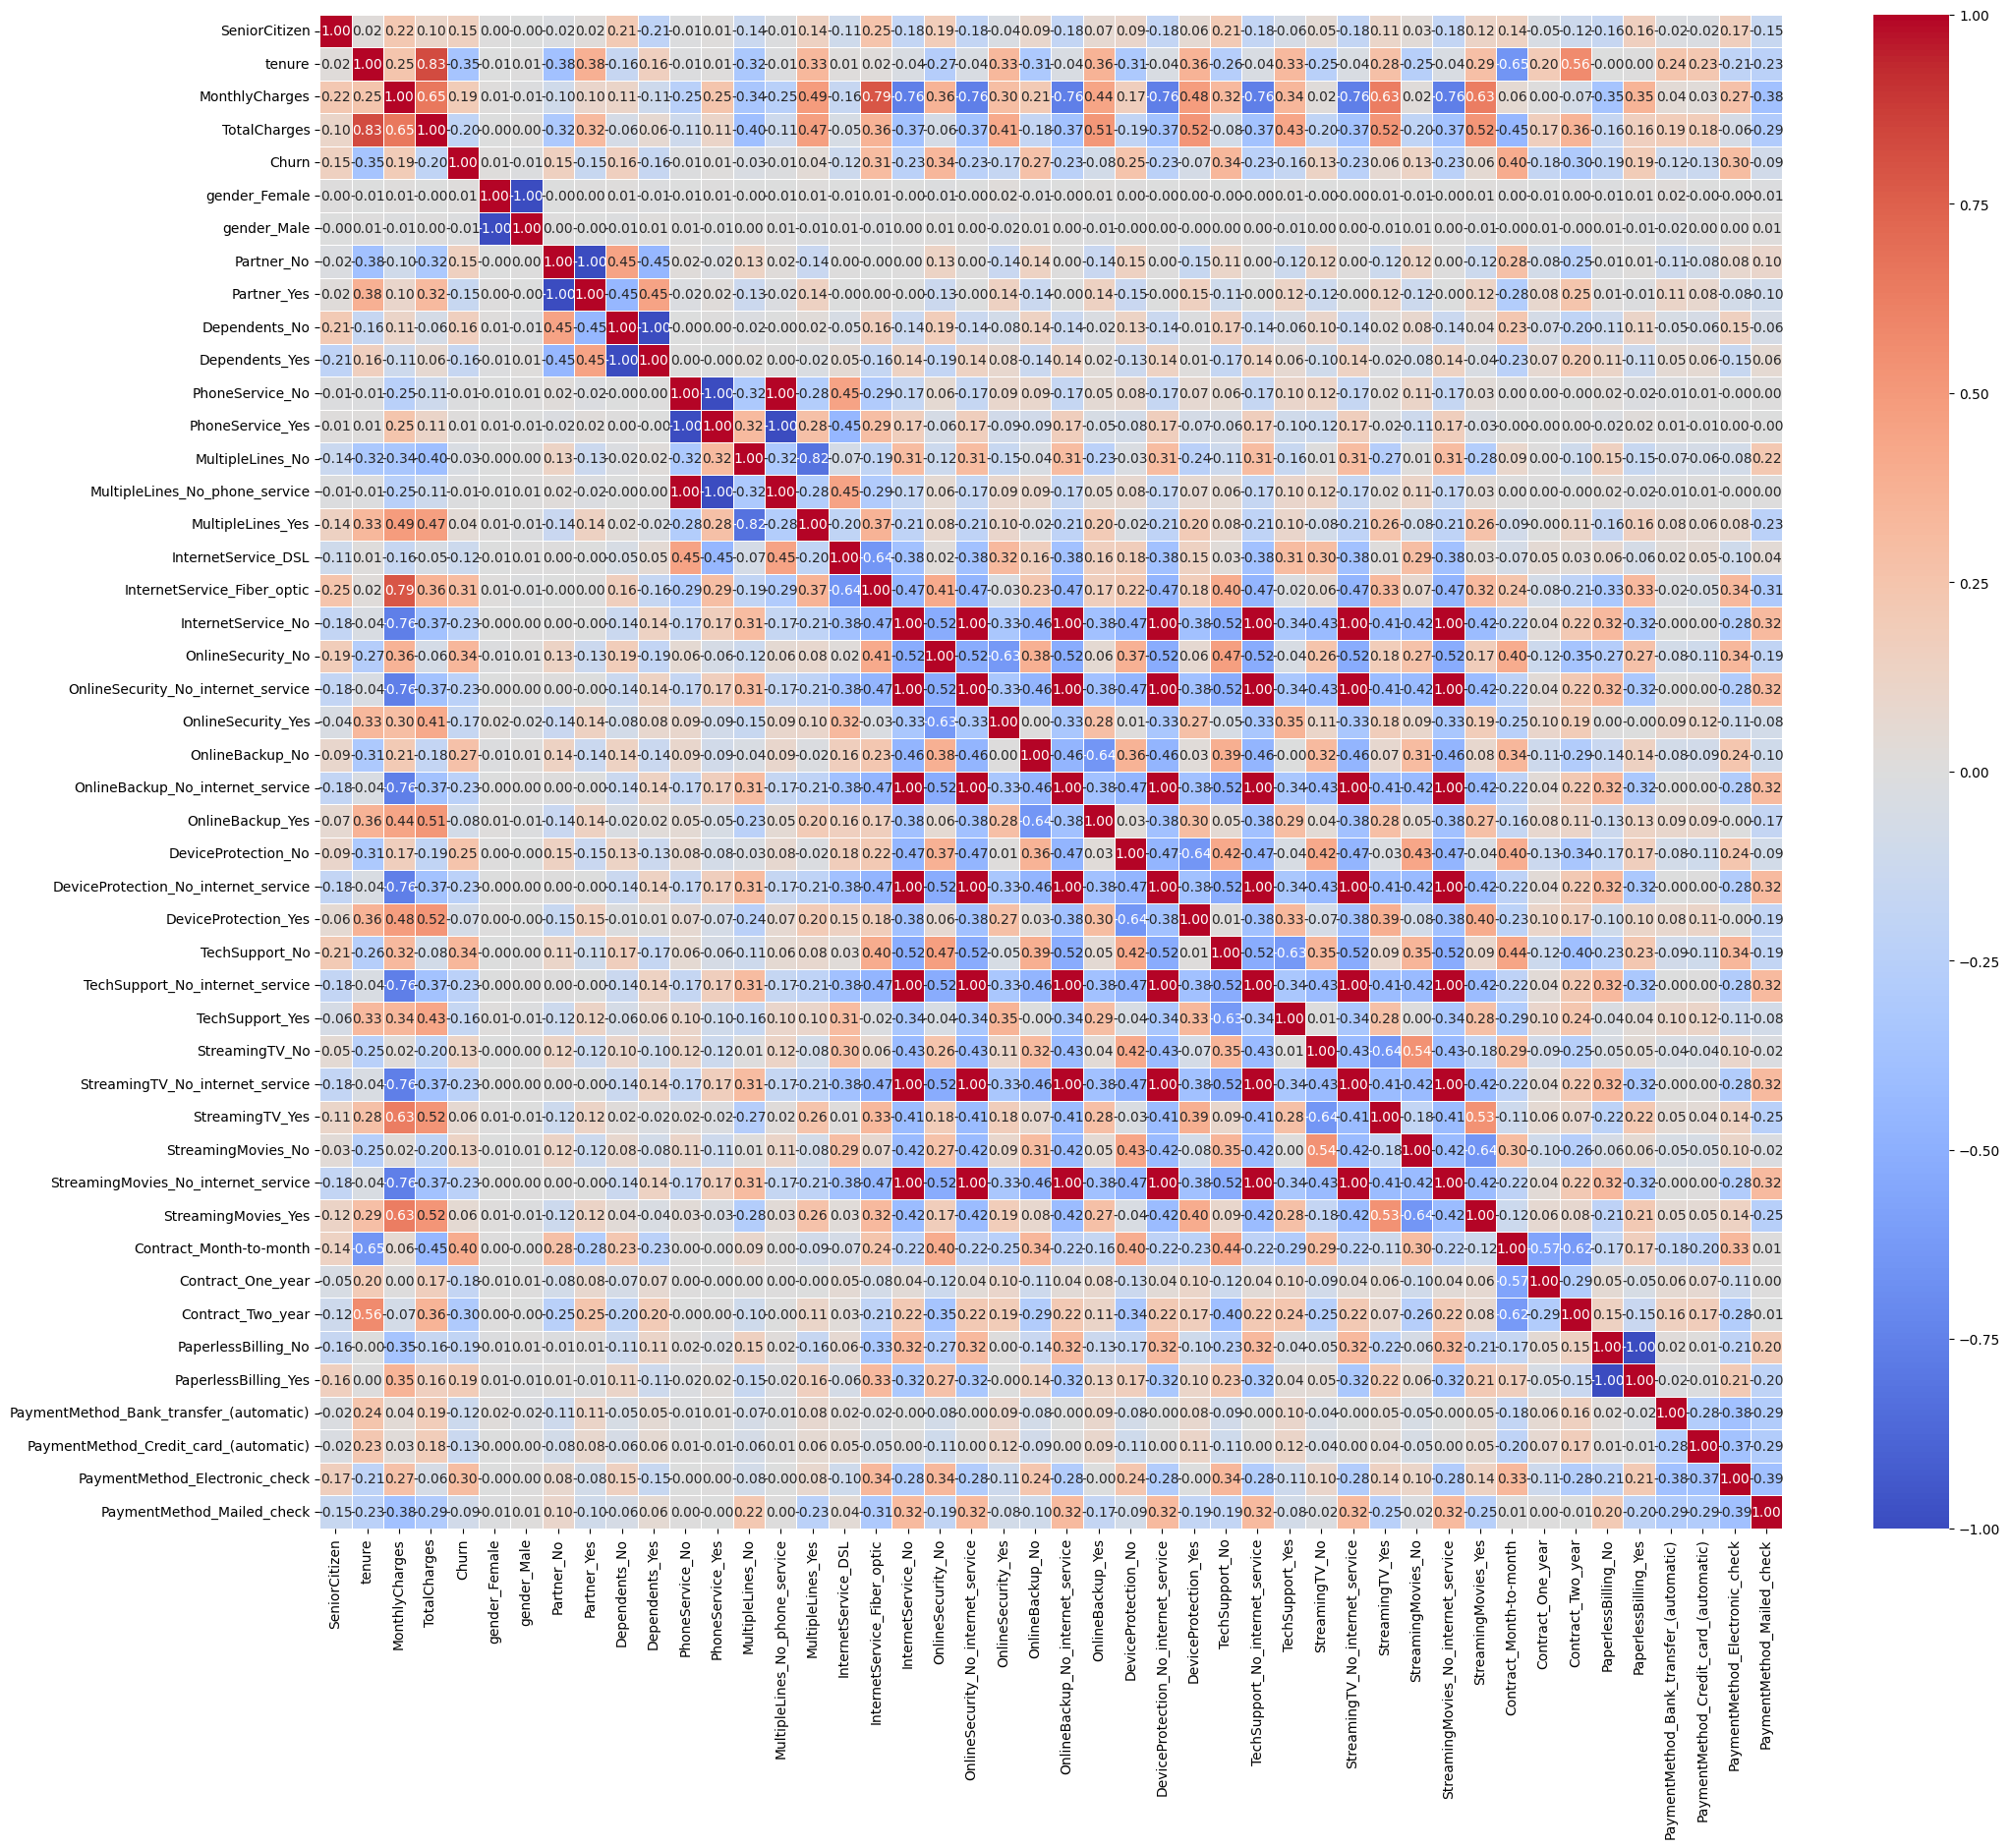

In [ ]:
plt.figure(figsize=(24,20))
sns.heatmap(df_fine_tune_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.savefig('correlation_heatmap.png')

**Final Observations**


*   Churn by OnlineSecurity Type shows that abscence of security results in higher churn. We see similar outcomes for absence of OnlineBackup Type hence we assume both to be same hence we would pick OnlineSecurity as OnlineFeatures feature.

*   Paperless Billing type results in higler churn which is correlated to PaymentType electronic check hence we would pick Paperless Billing as representation for Payments feature.

*   In our previous observations itself we have found that Month-to-month Contract type is directly correlated to churn hence we would pick this feature.

*   In our previous observations itself we have found that abscence of Tech support is directly correlated to churn hence we would pick this feature.

*   As we see that there is a marked class imbalance skewed in favour of no churn hence we have to use SMOTE to balance it out.

*   Also we see that tenure, MonthlyCharges, TotalCharges are highly correlated (multicollinearity) to the above categorical features (Contract, TechSupport, PaperlessBilling, OnlineSecurity) hence we are going to drop these features.

*   There is a marked class imbalance skewed in favour of no churn hence we have to use SMOTE to balance it out.



In [ ]:
df_fine_tune_encoded.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1,inplace=True)
df_fine_tune_encoded.to_csv(r'drive/MyDrive/Pfizer_Assessment/Feature_Store/Telco-Customer-Churn-Features.csv',index=False)